----------------------------------
       1.Data Selection           
----------------------------------

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, 

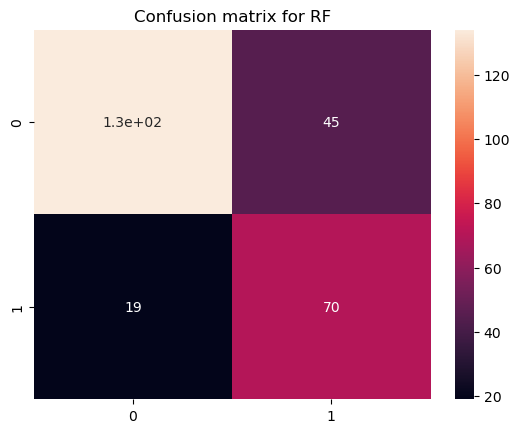

----------------------------------------
 GBDT 
----------------------------------------

1. Accuracy =  92.45585874799357

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       419
           1       0.85      0.94      0.89       204

    accuracy                           0.92       623
   macro avg       0.91      0.93      0.92       623
weighted avg       0.93      0.92      0.93       623




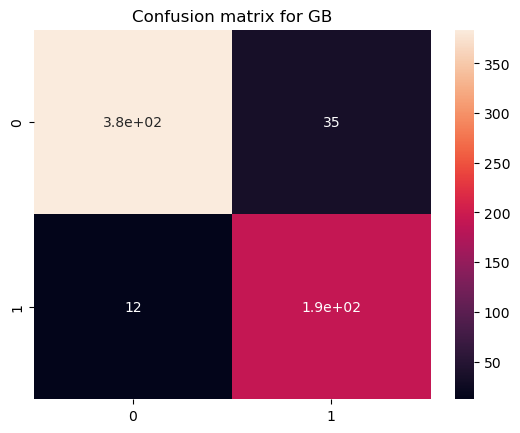

----------------------------------------
PREDICTION 
------------------------------------

---------------------------------------------------------
[0] arbitrary passenger on Titanic would is not survived 
--------------------------------------------------------
--------------------------------------------------------------
[1] arbitrary passenger on Titanic would survive the sinking 
-------------------------------------------------------------
---------------------------------------------------------
[2] arbitrary passenger on Titanic would is not survived 
--------------------------------------------------------
---------------------------------------------------------
[3] arbitrary passenger on Titanic would is not survived 
--------------------------------------------------------
---------------------------------------------------------
[4] arbitrary passenger on Titanic would is not survived 
--------------------------------------------------------


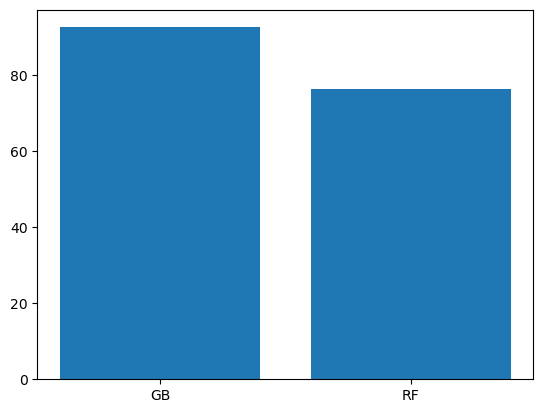

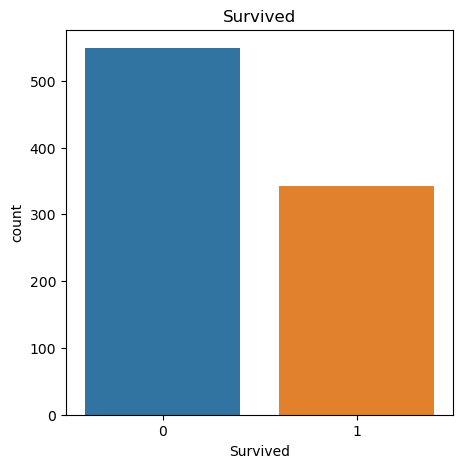

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("titanic_train.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))


#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("    Before Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()

data_frame['Age']=data_frame['Age'].fillna(0)
data_frame['Cabin']=data_frame['Cabin'].fillna(0)
data_frame['Embarked']=data_frame['Embarked'].fillna(0)

print("--------------------------------------------")
print("    After Checking missing values          ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()


#===  LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("---------------------------------")
print(" Before label encoding ")
print("---------------------------------")
print()
print(data_frame['Sex'].head(10))

data_frame['Sex']=label_encoder.fit_transform(data_frame['Sex'])
data_frame['Cabin']=label_encoder.fit_transform(data_frame['Cabin'].astype(str))
data_frame['Embarked']=label_encoder.fit_transform(data_frame['Embarked'].astype(str))


print("-------------------------------------------")
print(" After label Encoding ")
print("------------------------------------------")
print()

print(data_frame['Sex'].head(20))


# ==== DROP UNNCESSARY COLUMNS =====

data_frame=data_frame.drop(['Ticket','Name'],axis=1)


#=============================== 3. DATA SPLITTING ============================

X=data_frame.drop('Survived',axis=1)
y=data_frame['Survived']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("==============================================")
print("---------------- Data Splitting --------------")
print("==============================================")
print()
print("Total No.of data's in dataset  : ", data_frame.shape[0])
print()
print("Total No.of training data's   : ", X_train.shape[0])
print()
print("Total No.of testing data's    : ", X_test.shape[0])




#============================  CLASSIFICATION =============================

# ==== RANDOM FOREST ===

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

regressor = RandomForestClassifier()
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_pred = regressor.predict(X_test)

acc_dt=metrics.accuracy_score(Y_pred,y_test)*100

print("----------------------------------------")
print("RANDOM FOREST --> RF")
print("------------------------------------")
print()
print("1. Accuracy  =",acc_dt,'%' )
print()
print(metrics.classification_report(Y_pred,y_test))

cm_rf=metrics.confusion_matrix(Y_pred,y_test)

# === CONFUSION MATRIX ===

sns.heatmap(cm_rf, annot=True)
plt.title("Confusion matrix for RF")
plt.show()



# ==== GRADIENT BOOSTING ====


from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()

gbt.fit(X_train, y_train)

y_pred_gbt = gbt.predict(X_train)

from sklearn import metrics

acc_gbt=metrics.accuracy_score(y_pred_gbt,y_train)*100

print("----------------------------------------")
print(" GBDT ")
print("----------------------------------------")
print()
print("1. Accuracy = ", acc_gbt)
print()
print(metrics.classification_report(y_pred_gbt,y_train))
print()

cm_gbt=metrics.confusion_matrix(y_pred_gbt,y_train)

# === CONFUSION MATRIX ===

sns.heatmap(cm_gbt, annot=True)
plt.title("Confusion matrix for GB")
plt.show()


# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if Y_pred[i]==0:
        print("--------------------------------------------------------------")
        print([i],"arbitrary passenger on Titanic would survive the sinking ")
        print("-------------------------------------------------------------")
    else:
        print("---------------------------------------------------------")
        print([i],"arbitrary passenger on Titanic would is not survived ")
        print("--------------------------------------------------------")        


# ===== COMPARISON =====

vals=[acc_gbt,acc_dt]
inds=range(len(vals))
labels=["GB","RF"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Survived")
sns.countplot(x='Survived',data=data_frame)
plt.show()


